In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,fbeta_score,matthews_corrcoef, log_loss, confusion_matrix,classification_report,make_scorer,balanced_accuracy_score
from sklearn.metrics import accuracy_score, roc_curve, auc,recall_score,roc_auc_score, average_precision_score, precision_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv('predictive_maintenance.csv')


In [ ]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [ ]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

In [ ]:
df.drop(['Product ID',"UDI"], axis=1, inplace=True)

In [ ]:
df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
df.isnull().values.any()

False

In [ ]:
df.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

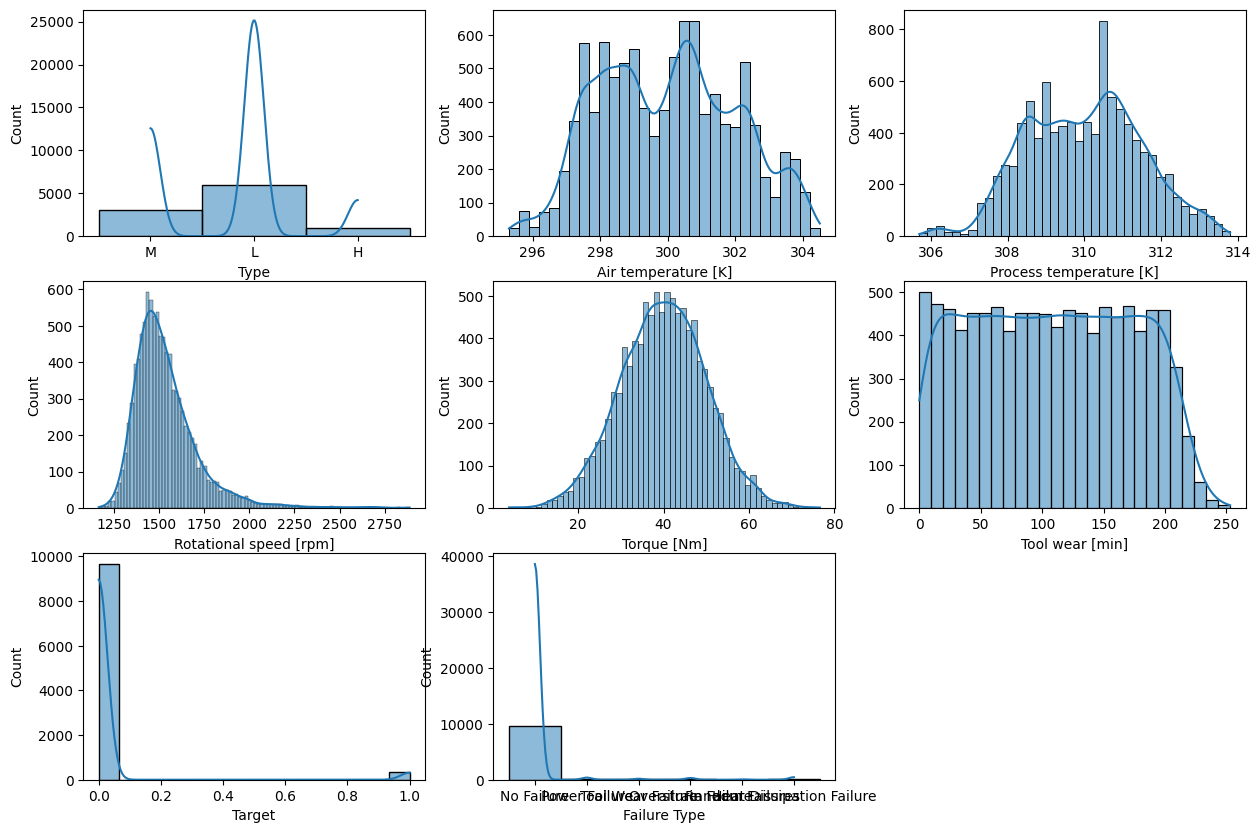

In [ ]:
plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(3,3,i)
    sns.histplot(df[col],kde=True)

array([[<Axes: title={'center': 'Air temperature [K]'}>,
        <Axes: title={'center': 'Process temperature [K]'}>],
       [<Axes: title={'center': 'Rotational speed [rpm]'}>,
        <Axes: title={'center': 'Torque [Nm]'}>],
       [<Axes: title={'center': 'Tool wear [min]'}>,
        <Axes: title={'center': 'Target'}>]], dtype=object)

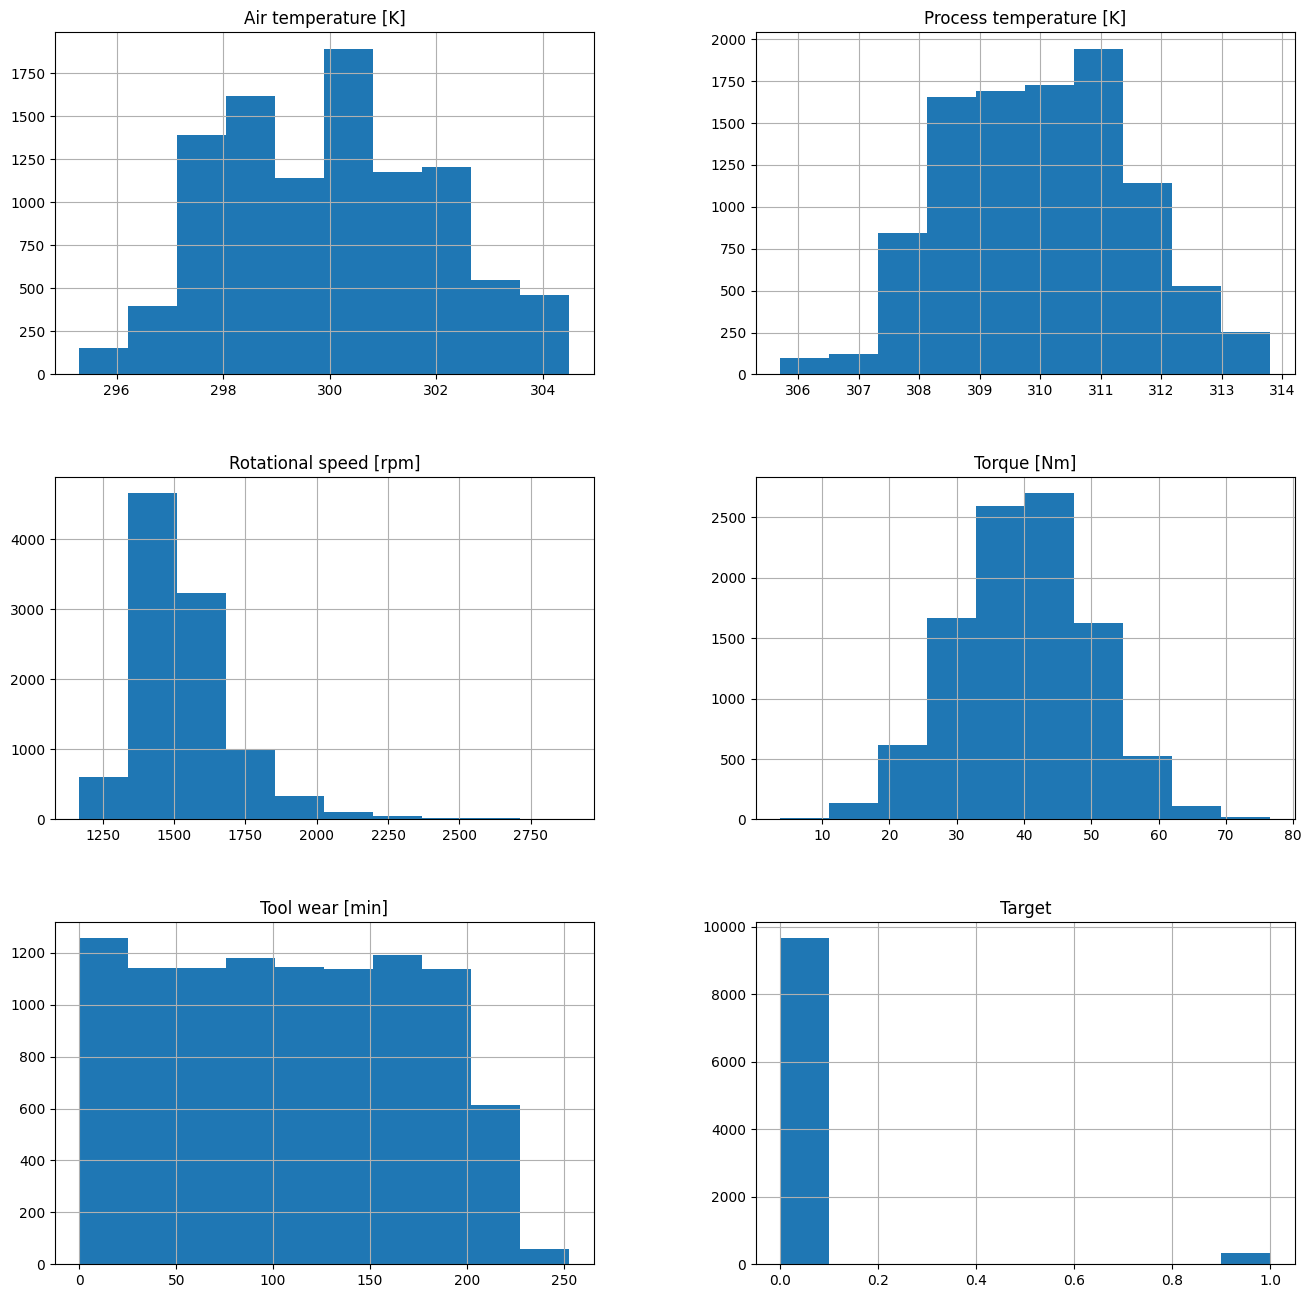

In [ ]:
df.hist(figsize=(16, 16))

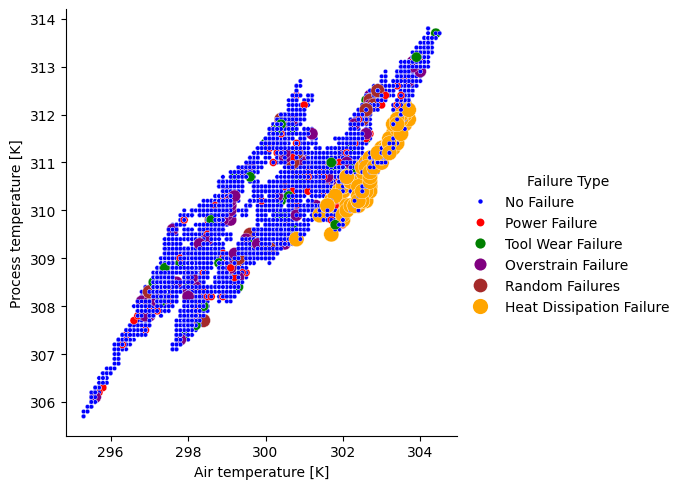

In [ ]:
custom_palette = {
    "No Failure": "blue",
    "Heat Dissipation Failure": "orange",
    "Tool Wear Failure": "green",
    "Power Failure": "red",
    "Overstrain Failure": "purple",
    "Random Failures": "brown"
}

# Use the custom color palette in the relplot
axis = sns.relplot(
    x="Air temperature [K]",
    y="Process temperature [K]",
    hue="Failure Type",
    size="Failure Type",
    sizes=(120, 10),
    palette=custom_palette,  # Specify the custom color palette here
    data=df
)

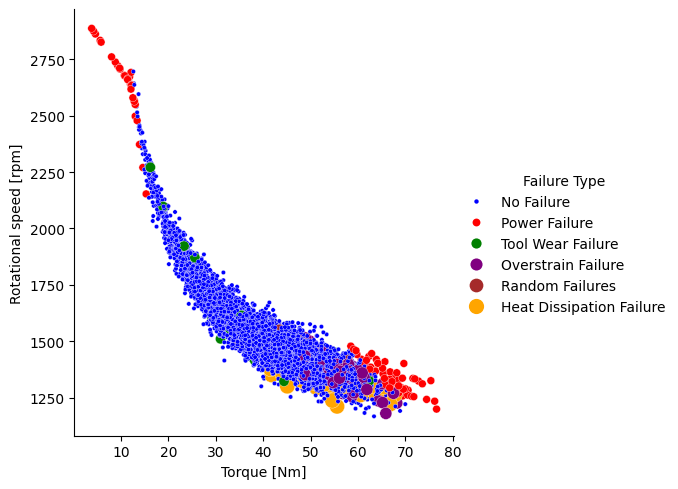

In [ ]:
custom_palette = {
    "No Failure": "blue",
    "Heat Dissipation Failure": "orange",
    "Tool Wear Failure": "green",
    "Power Failure": "red",
    "Overstrain Failure": "purple",
    "Random Failures": "brown"
}

# Use the custom color palette in the relplot
axis = sns.relplot(
    x="Torque [Nm]",
    y="Rotational speed [rpm]",
    hue="Failure Type",
    size="Failure Type",
    sizes=(120, 10),
    palette=custom_palette,  # Specify the custom color palette here
    data=df
)

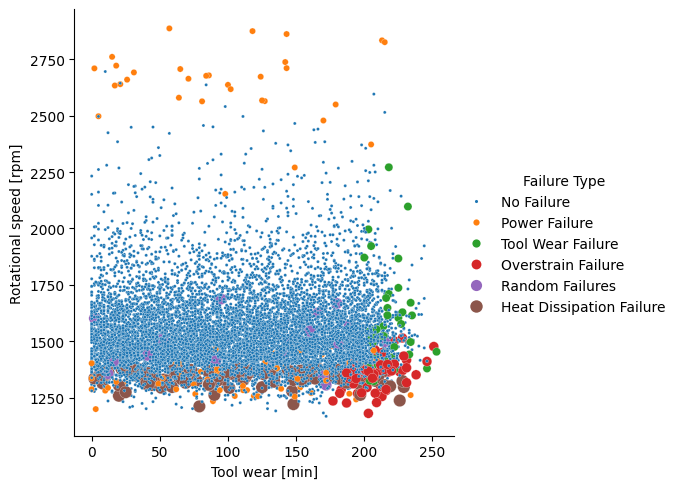

In [ ]:
custom_palette = {
    "No Failure": "blue",
    "Heat Dissipation Failure": "orange",
    "Tool Wear Failure": "green",
    "Power Failure": "red",
    "Overstrain Failure": "purple",
    "Random Failures": "brown"
}

axis = sns.relplot(x="Tool wear [min]",
                y="Rotational speed [rpm]",
                hue="Failure Type",
                size="Failure Type",
                sizes=(80, 5),
                data=df)

In [ ]:
Failure_mapping = {
    'No Failure': 0,
    "Heat Dissipation Failure": 1,
    'Power Failure': 2,
    "Overstrain Failure": 3,
    "Tool Wear Failure": 4,
    "Random Failures": 5,
    }

# Replace values in the column
df['Failure Type'] = df['Failure Type'].replace(Failure_mapping)


C:\Users\PC\AppData\Local\Temp\ipykernel_8360\2189705435.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Failure Type'] = df['Failure Type'].replace(Failure_mapping)


In [ ]:
df["Type"].replace({"H":0,"L":1,"M":2}, inplace=True)

df.head()


C:\Users\PC\AppData\Local\Temp\ipykernel_8360\4162648564.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Type"].replace({"H":0,"L":1,"M":2}, inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_8360\4162648564.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Type"].replace({"H":0,"L

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,2,298.1,308.6,1551,42.8,0,0,0
1,1,298.2,308.7,1408,46.3,3,0,0
2,1,298.1,308.5,1498,49.4,5,0,0
3,1,298.2,308.6,1433,39.5,7,0,0
4,1,298.2,308.7,1408,40.0,9,0,0


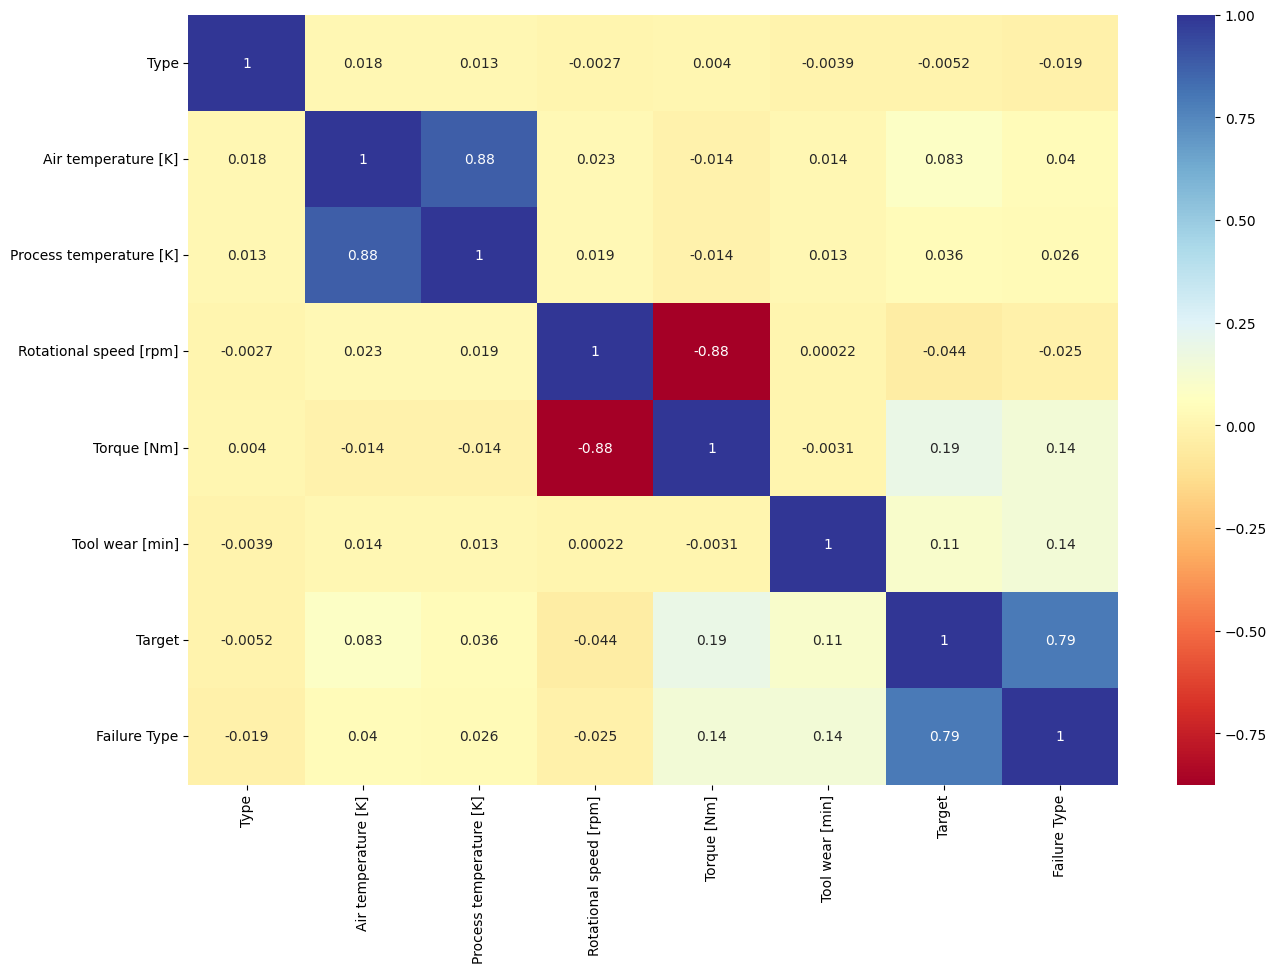

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot = True,cmap = "RdYlBu")
plt.draw()

In [ ]:
col_name=df.columns.to_list()
col_name

['Type',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Target',
 'Failure Type']

In [ ]:
predictive_columns = col_name[0:6]
X = df[predictive_columns]
y = df["Failure Type"]

In [ ]:
X.isnull().values.any()

False

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=40, test_size=0.20)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
clf = DecisionTreeClassifier()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Decision Tree Accuracy: 0.9715

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1932
           1       0.82      0.82      0.82        17
           2       0.74      0.64      0.68        22
           3       0.63      0.67      0.65        18
           4       0.09      0.12      0.11         8
           5       0.00      0.00      0.00         3

    accuracy                           0.97      2000
   macro avg       0.55      0.54      0.54      2000
weighted avg       0.98      0.97      0.97      2000


Confusion Matrix:
[[1902    2    5    6    9    8]
 [   3   14    0    0    0    0]
 [   7    0   14    1    0    0]
 [   5    0    0   12    1    0]
 [   7    0    0    0    1    0]
 [   2    1    0    0    0    0]]


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

le = LabelEncoder()
df['Failure Type'] = le.fit_transform(df['Failure Type'])

# Split the dataset into features and target variable
X = df.drop(columns=['Failure Type'])  # Features
y = df['Failure Type']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply SMOTE resampling to the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier on the resampled training data
clf.fit(X_train_res, y_train_res)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.976

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      2903
           1       0.88      0.96      0.92        23
           2       0.76      0.84      0.80        31
           3       0.79      0.68      0.73        22
           4       0.87      0.93      0.90        14
           5       0.00      0.00      0.00         7

    accuracy                           0.98      3000
   macro avg       0.72      0.73      0.72      3000
weighted avg       0.99      0.98      0.98      3000


Confusion Matrix:
[[2852    0    3    0    0   48]
 [   0   22    1    0    0    0]
 [   0    1   26    4    0    0]
 [   0    2    3   15    2    0]
 [   0    0    1    0   13    0]
 [   7    0    0    0    0    0]]


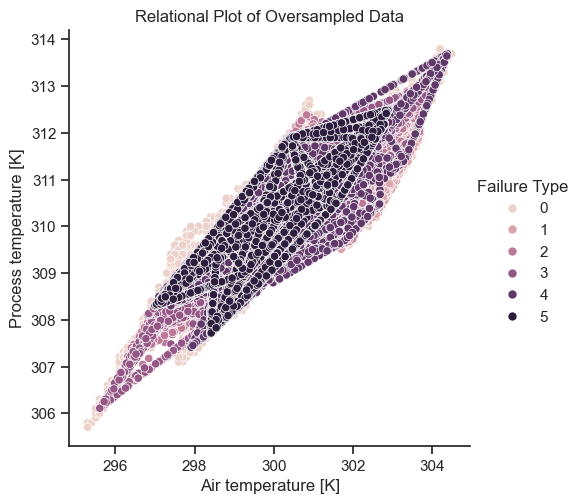

In [ ]:
df_resampled = pd.DataFrame(X_train_res, columns=X_train.columns)
df_resampled['Failure Type'] = y_train_res

# Visualize the relationship between variables using sns.relplot
# Adjust the plot as per your requirements
sns.set(style="ticks")
sns.relplot(x="Air temperature [K]", y="Process temperature [K]", hue="Failure Type", data=df_resampled)
plt.title('Relational Plot of Oversampled Data')
plt.show()

In [ ]:
from imblearn.combine import SMOTETomek
from sklearn.datasets import make_classification
from collections import Counter

# Split the dataset into features and target variable
X = df.drop(columns=['Failure Type'])  # Features
y = df['Failure Type']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
smote = SMOTETomek(random_state=42)
X1_res, y1_res = smote.fit_resample(X_train,y_train)

In [ ]:
print(X1_res.shape)
print(y1_res.shape)

(40432, 7)
(40432,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

smote_tomek = SMOTETomek(random_state=42)

X1_res, y1_res = smote_tomek.fit_resample(X_train, y_train)

clf_res= DecisionTreeClassifier(random_state=42)

# Train the classifier on the resampled data
clf_res.fit(X1_res, y1_res)

# Predict the labels for the test data
y_pred = clf_res.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after resampling:", accuracy)

Accuracy after resampling: 0.975


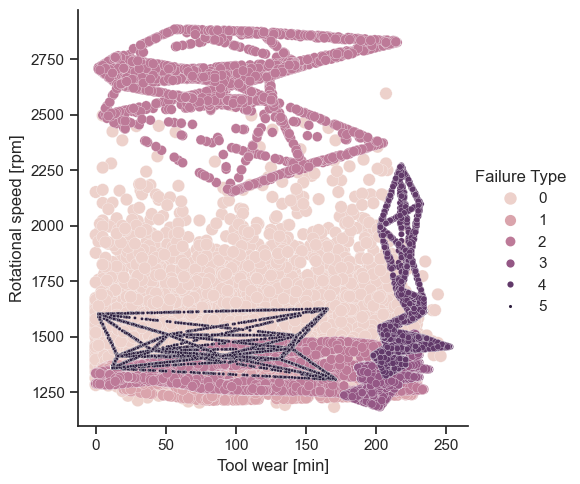

In [ ]:
df1 = pd.concat([X1_res, y1_res], axis=1)

axis = sns.relplot(x="Tool wear [min]",
                y="Rotational speed [rpm]",
                hue="Failure Type",
                size="Failure Type",
                sizes=(80, 5),
                data=df1)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have your training and testing data already defined: X_train, y_train, X_test, y_test

# Initialize the SVM classifier
svm_clf = SVC(random_state=42)

# Train the classifier on the training data
svm_clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred_svm = svm_clf.predict(X_test)

# Calculate the accuracy of the SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.968


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from imblearn.combine import SMOTETomek

# Initialize the SMOTETomek resampler
smote_tomek = SMOTETomek(random_state=42)

# Resample the training data
X1_res, y1_res = smote_tomek.fit_resample(X_train, y_train)

# Initialize the SVM classifier
svm_clf = SVC(random_state=42)

# Train the classifier on the resampled data
svm_clf.fit(X1_res, y1_res)

# Predict the labels for the test data
y_pred_svm = svm_clf.predict(X_test)

# Calculate the accuracy of the SVM classifier
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy after resampling:", accuracy_svm)

SVM Accuracy after resampling: 0.39966666666666667


In [ ]:
clf_res

DecisionTreeClassifier(random_state=42)

In [ ]:
X1_res.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,2,297.2,308.2,1678,28.1,133,0
1,2,299.3,309.2,1334,46.3,31,0
2,2,300.5,312.0,1263,60.8,146,0
3,1,298.3,308.3,1444,43.8,176,0
4,1,303.9,312.9,1526,42.5,194,0


In [ ]:
import numpy as np

In [ ]:
filtered_df = df[df['Failure Type'] == 1]
filtered_df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
3236,2,300.8,309.4,1342,62.4,113,1,1
3760,1,302.3,310.9,1377,46.8,166,1,1
3787,1,302.3,310.8,1377,47.3,22,1,1
3793,1,302.3,310.9,1379,49.3,34,1,1
3806,2,302.3,310.9,1360,44.0,67,1,1


In [ ]:
data_to_predict = [[2, 302.3, 310.9	, 1360, 44.0, 67,1]]
prediction = clf_res.predict(data_to_predict)

print("Predicted class:", prediction)

Predicted class: [1]


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
! pip install streamlit

In [ ]:
import pickle
filename = 'training_model.sav'
pickle.dump(clf_res, open(filename, 'wb'))


In [ ]:
loaded_model = pickle.load(open('training_model.sav', 'rb'))

In [ ]:
data_to_predict = [[2, 302.3, 310.9	, 1360, 44.0, 67,1]]
prediction = loaded_model.predict(data_to_predict)

print("Predicted class:", prediction)

Predicted class: [1]


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
